In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score


In [11]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/E-Commerce-Dataset.csv"
df = pd.read_csv(url)
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [12]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [13]:
df.shape

(5630, 20)

## I analyze the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Number of rows: 5,630

Some columns have missing values

In [15]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [16]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


The column that is important for us is the Churn column, as it serves as the label ( the class to be predicted).

Let’s look at the distribution of values in this column:

In [17]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
0,83.161634
1,16.838366


4682 customers made a repeat purchase (retained)

948 customers churned (left)

###Let’s calculate the ratio

In [18]:
churn_rate = df['Churn'].value_counts()/len(df)*100

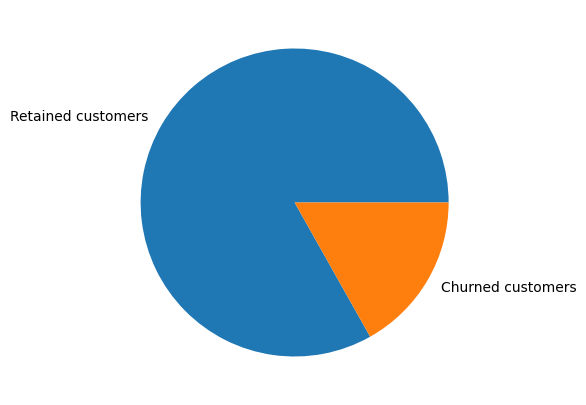

In [19]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Retained customers','Churned customers'])
plt.show()

#### Let’s analyze some of the numerical columns

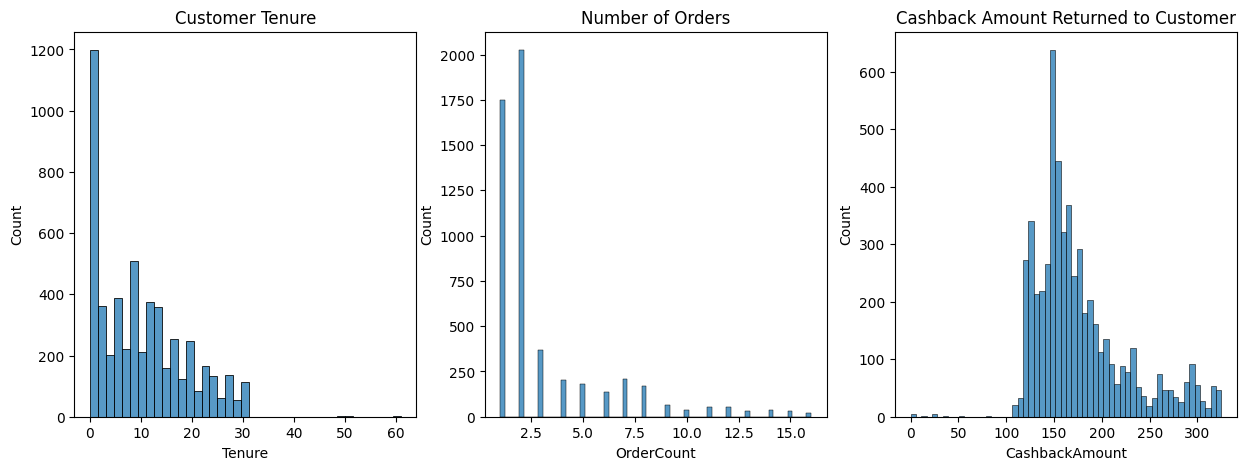

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Customer Tenure")

# OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Number of Orders")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Cashback Amount Returned to Customer")

plt.show()

#### Let’s analyze the categorical columns.

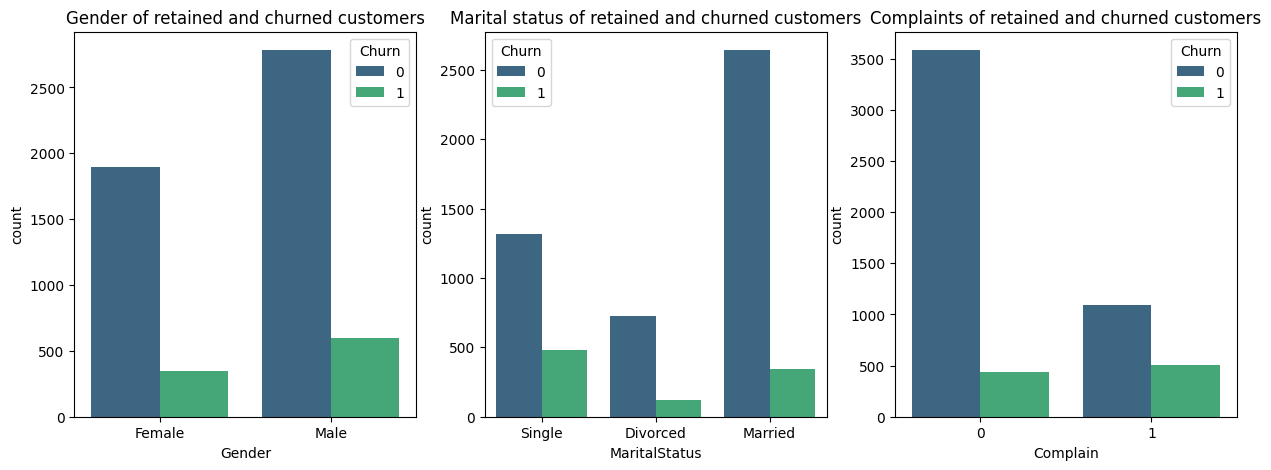

In [21]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of retained and churned customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital status of retained and churned customers")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Complaints of retained and churned customers")

plt.show()

In [22]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


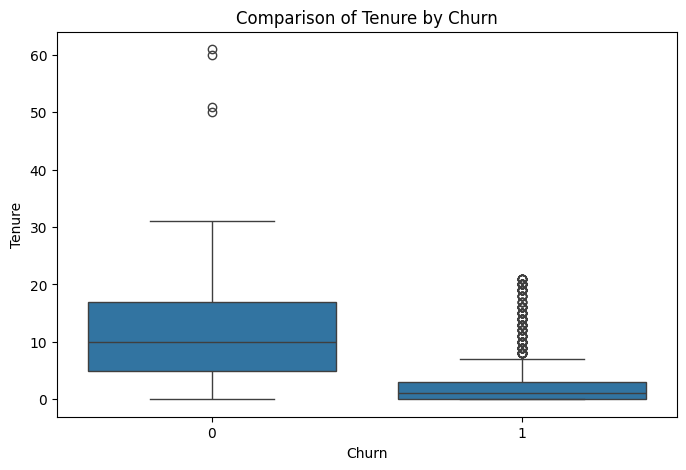

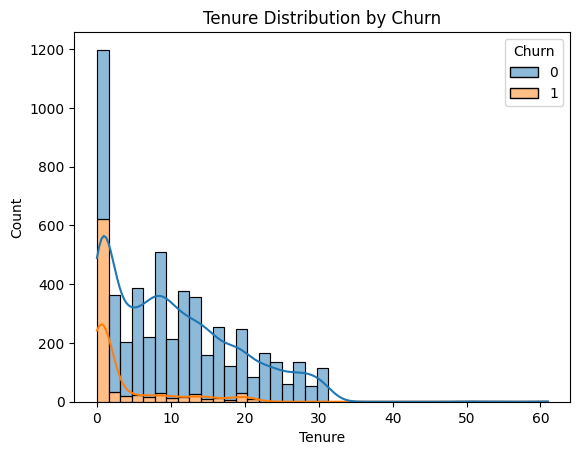

In [23]:
# 1. Visualization by Tenure
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Comparison of Tenure by Churn')
plt.show()

sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, multiple="stack")
plt.title('Tenure Distribution by Churn')
plt.show()

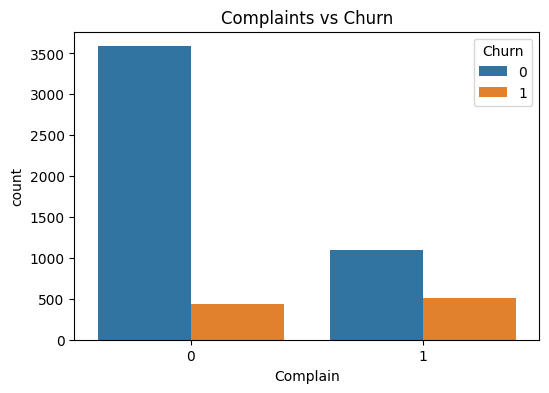

In [24]:
# 2. Visualization by Complain
plt.figure(figsize=(6,4))
sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Complaints vs Churn')
plt.show()


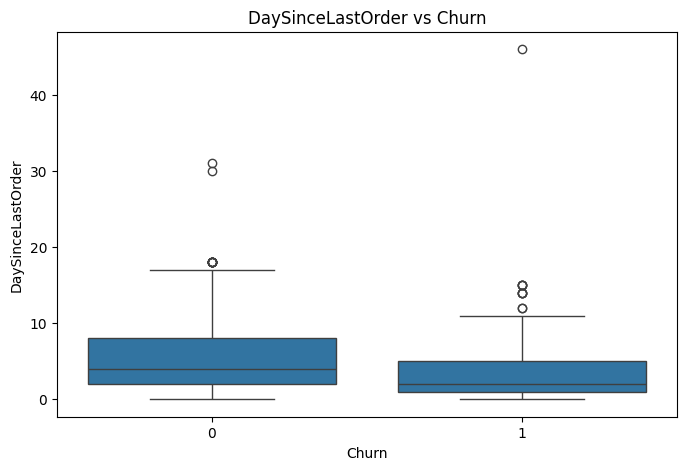

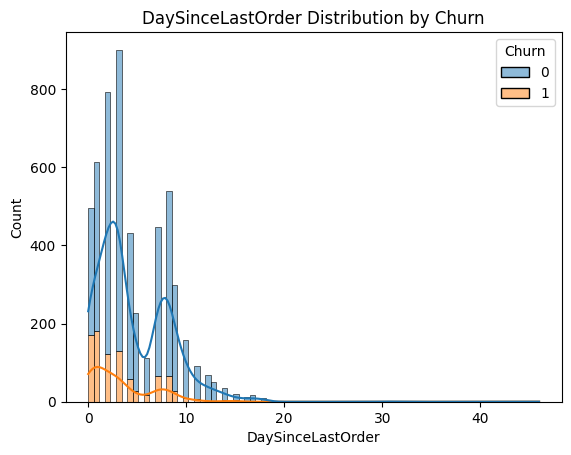

In [25]:
# 3. Visualization by DaySinceLastOrder
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('DaySinceLastOrder vs Churn')
plt.show()

sns.histplot(data=df, x='DaySinceLastOrder', hue='Churn', kde=True, multiple="stack")
plt.title('DaySinceLastOrder Distribution by Churn')
plt.show()


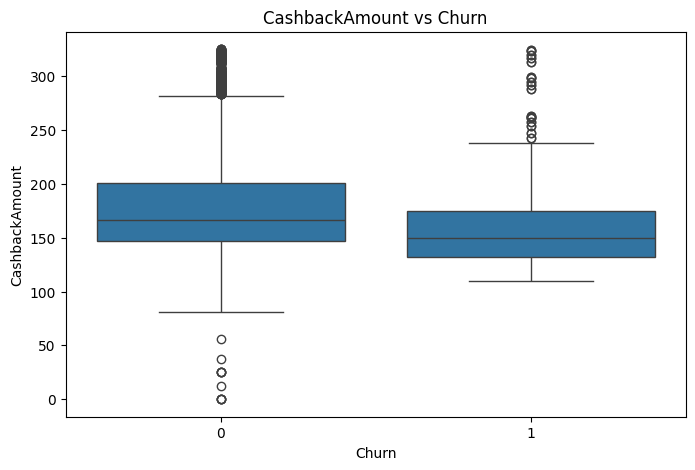

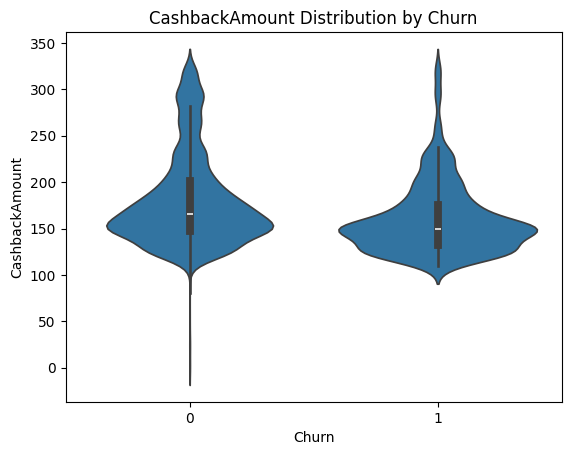

In [26]:
# 4. Visualization by CashbackAmount
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='CashbackAmount', data=df)
plt.title('CashbackAmount vs Churn')
plt.show()

sns.violinplot(x='Churn', y='CashbackAmount', data=df)
plt.title('CashbackAmount Distribution by Churn')
plt.show()


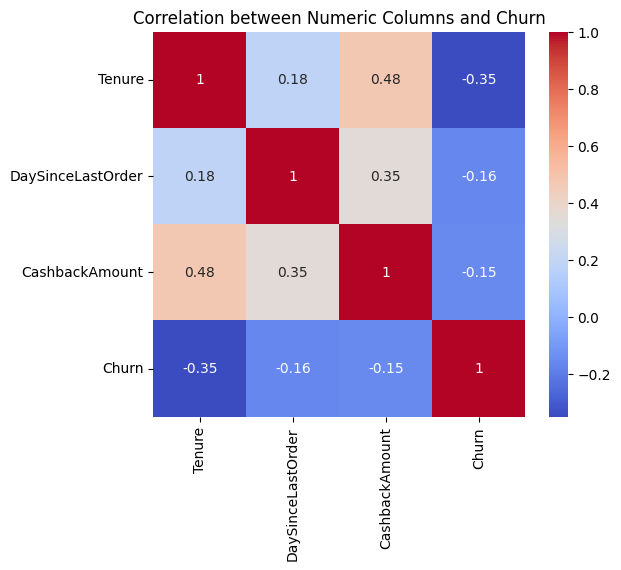

In [27]:
# 5. Correlation heatmap (numeric columns)
numeric_cols = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Columns and Churn')
plt.show()

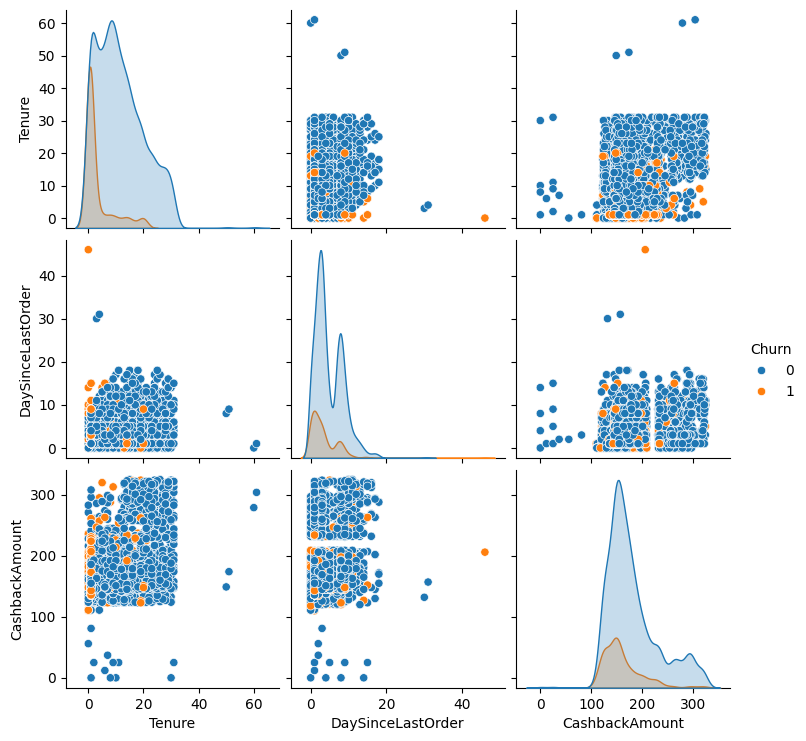

In [28]:
# 6. Pairplot for overall analysis
sns.pairplot(df, hue='Churn', vars=['Tenure', 'DaySinceLastOrder', 'CashbackAmount'])
plt.show()

## Data preprocessing

In [29]:
print(f"Number of missing values: {df.isnull().sum().sum()}")
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Number of missing rows: {missing_rows}")
#qatorlar nisbati
print(f"Missing rows %: {np.round(missing_rows/len(df)*100)}%")

Number of missing values: 1856
Number of missing rows: 1856
Missing rows %: 33.0%


33% is quite a lot. But are we going to use all the columns?

Let’s select the columns with high correlation

In [30]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [31]:
print(f"Number of missing values: {data.isnull().sum().sum()}")

missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Number of missing rows: {missing_rows}")
#qatorlar nisbati
print(f"Missing rows %: {np.round(missing_rows/len(data)*100)}%")

Number of missing values: 571
Number of missing rows: 571
Missing rows %: 10.0%


10% of the rows have missing values.

In [32]:
data = data.dropna()
data.shape

(5059, 7)

In [33]:
data['Churn'].value_counts()/len(data)

,count
Churn,
0,0.839296
1,0.160704


## Preparation for ML

In [34]:
# Convert text columns to numbers.
encoded = LabelEncoder()
data['MaritalStatus']  = encoded.fit_transform(data['MaritalStatus'])
data['Gender'] = encoded.fit_transform(data['Gender'])


In [35]:
X = data.drop("Churn", axis=1)
y = data['Churn']

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## ML

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.71      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.80      0.67      0.71      1012
weighted avg       0.86      0.87      0.86      1012

Model accuracy: 0.8735177865612648


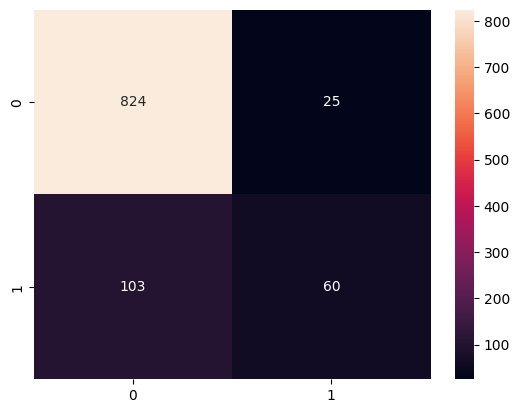

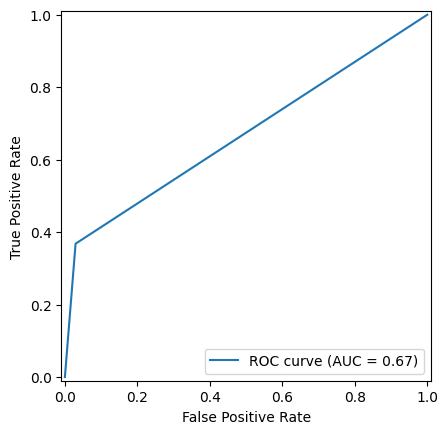

In [38]:
# Model training
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Model evaluation
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.70      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.79      0.67      0.70      1012
weighted avg       0.86      0.87      0.86      1012

Model accuracy: 0.8725296442687747
f1_score: 0.4819277108433735


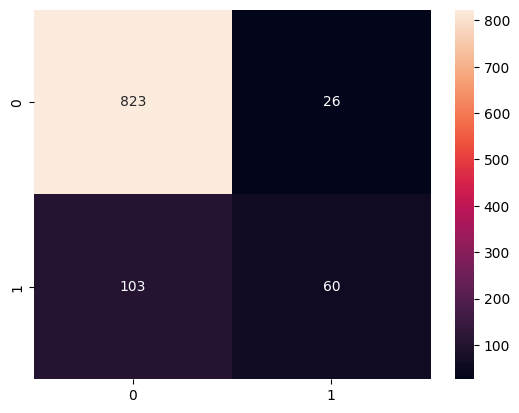

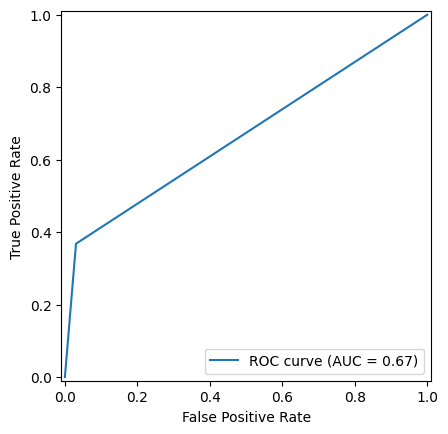

In [39]:
# Model training
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Model evaluation
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))
print("f1_score:", metrics.f1_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.87      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.92      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Model accuracy: 0.9525691699604744


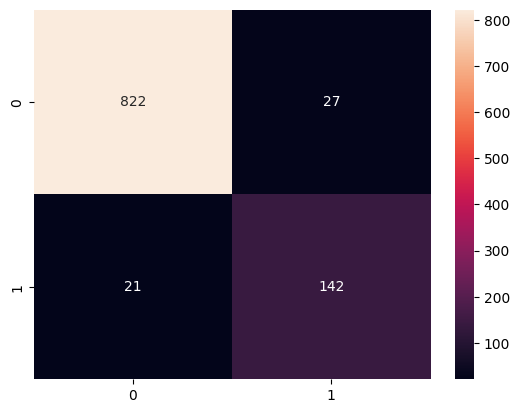

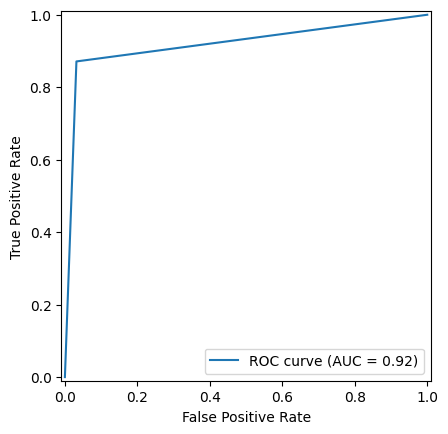

In [40]:
# Model training
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni evaluation
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [45]:
cols = data.drop('Churn', axis=1).columns

DecisionTrees's Accuracy:  0.9515810276679841
f1_score: 0.851963746223565


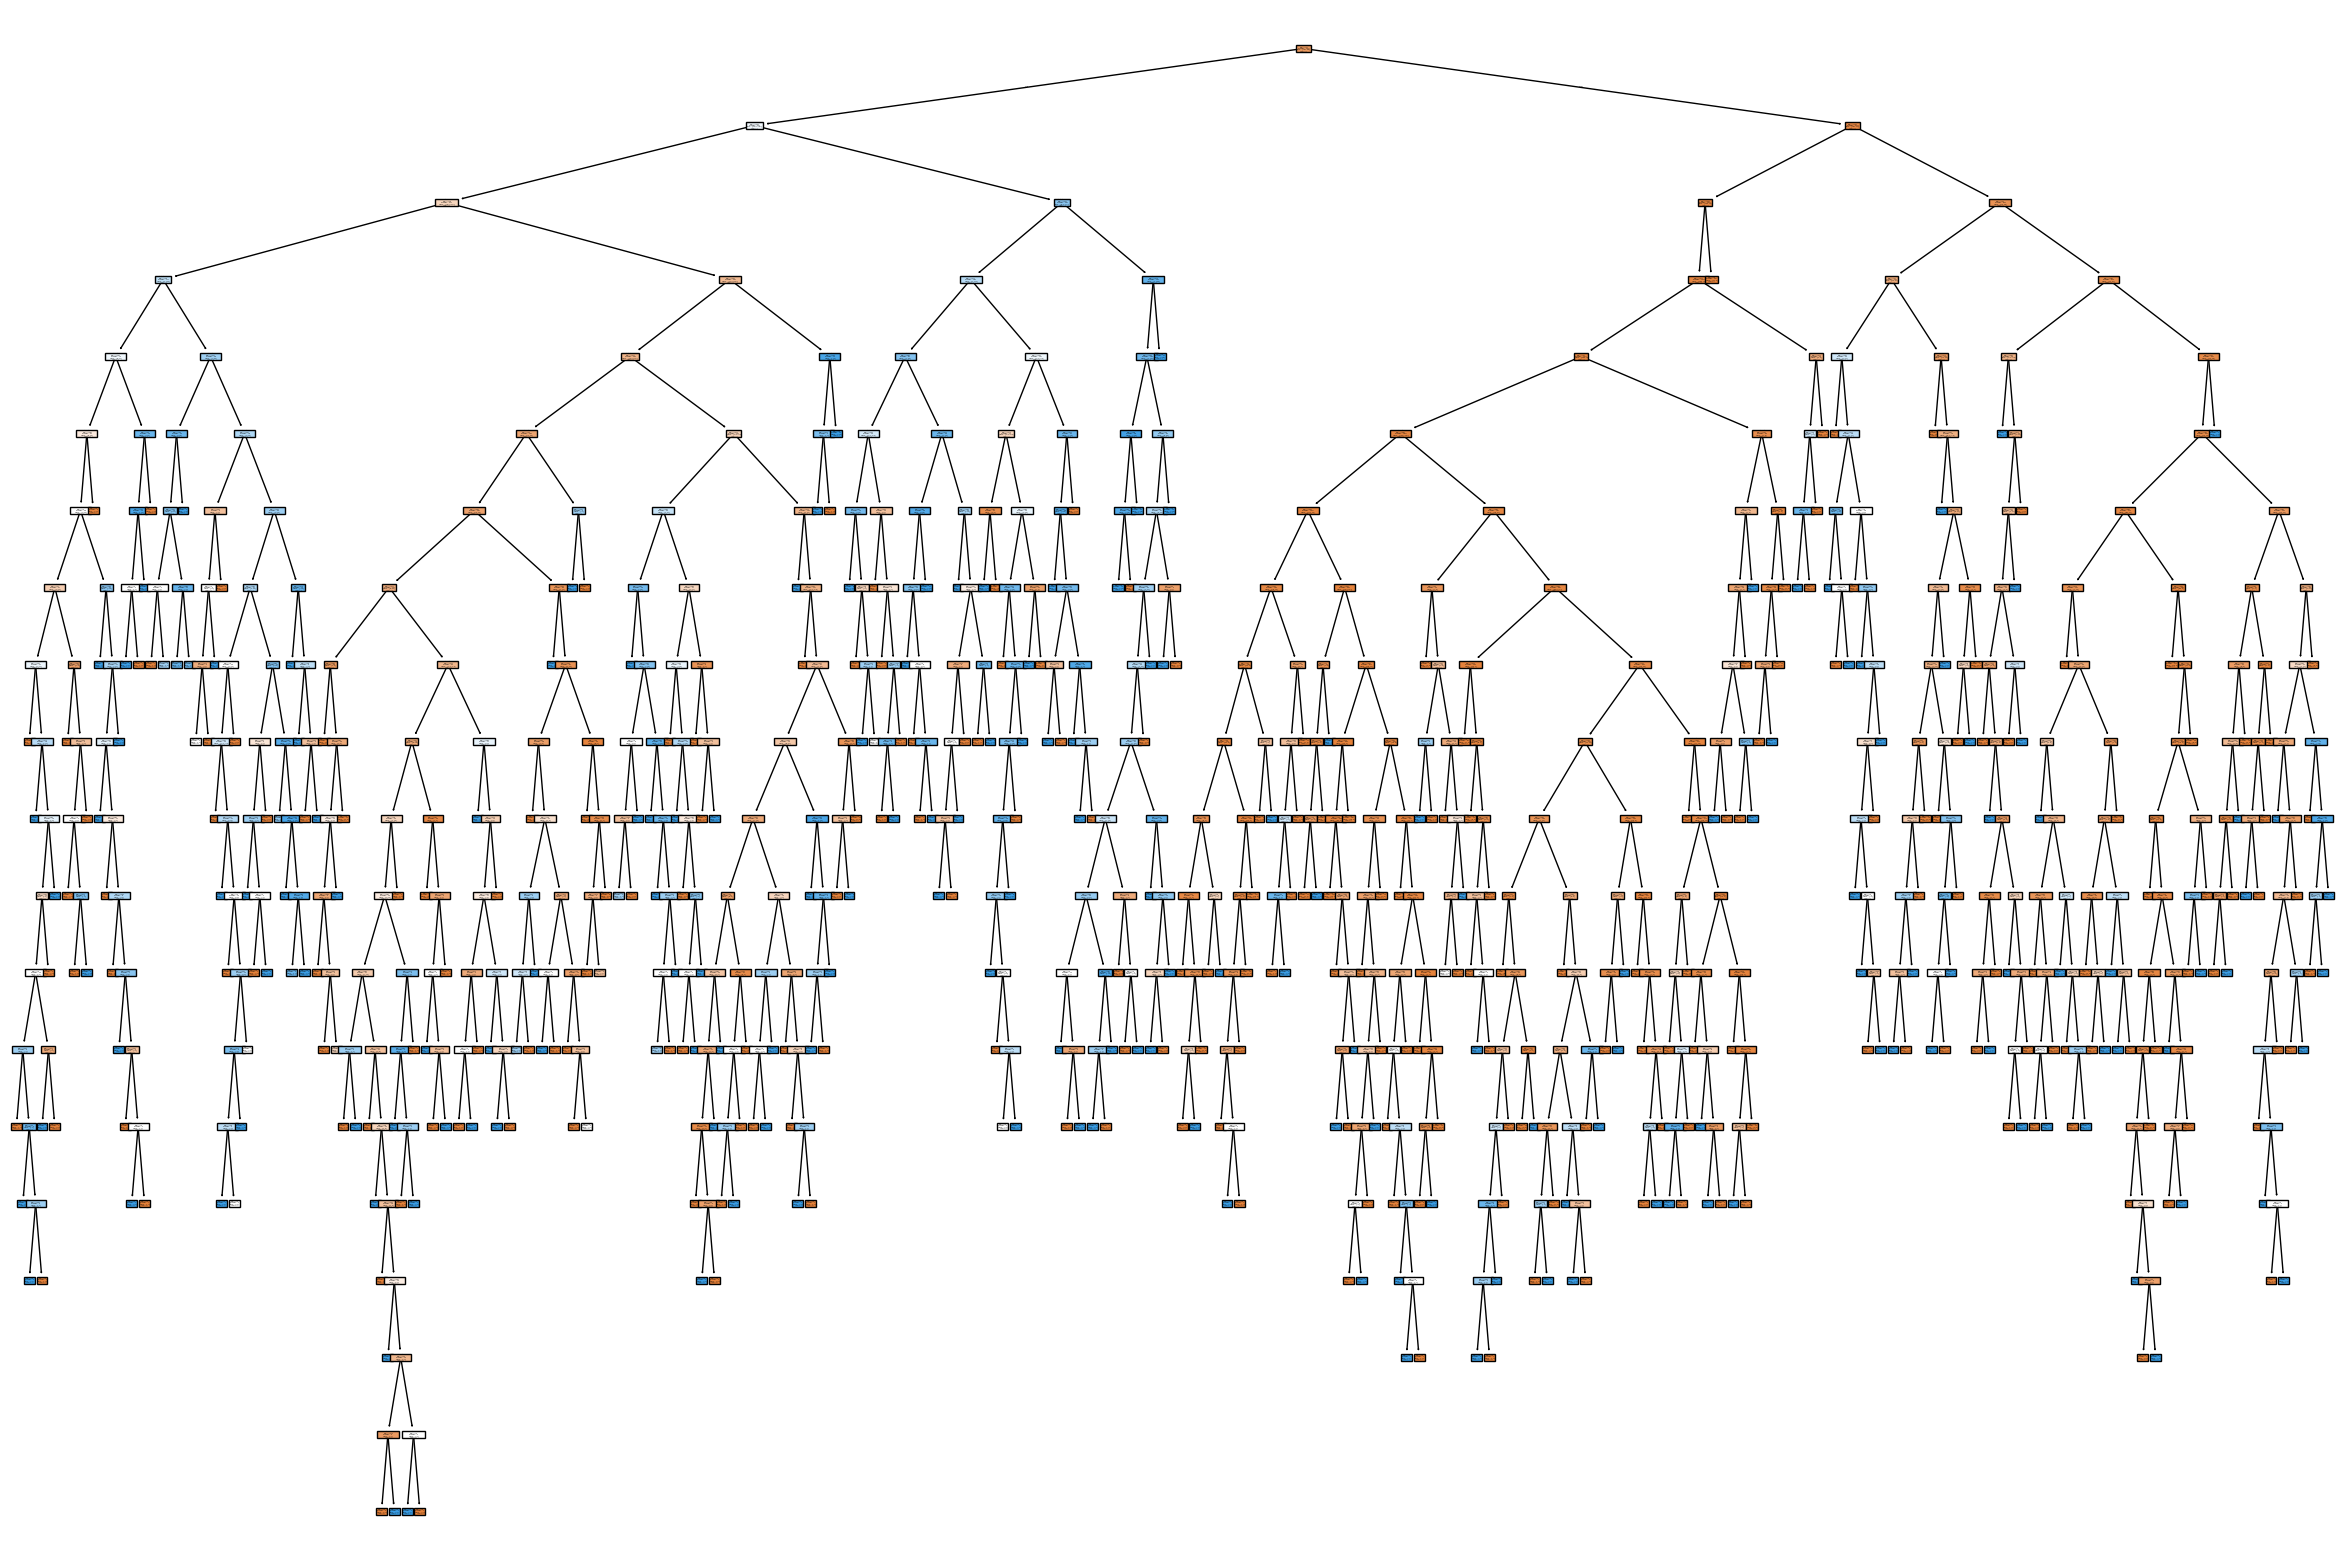

In [52]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import tree

tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=20)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("f1_score:",f1_score(y_test,y_predict))
plt.figure(figsize=(30,20))
classes = ['0', '1']
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       849
           1       0.80      0.78      0.79       163

    accuracy                           0.93      1012
   macro avg       0.88      0.87      0.88      1012
weighted avg       0.93      0.93      0.93      1012

Model accuracy: 0.9337944664031621
f1_score: 0.7912772585669782


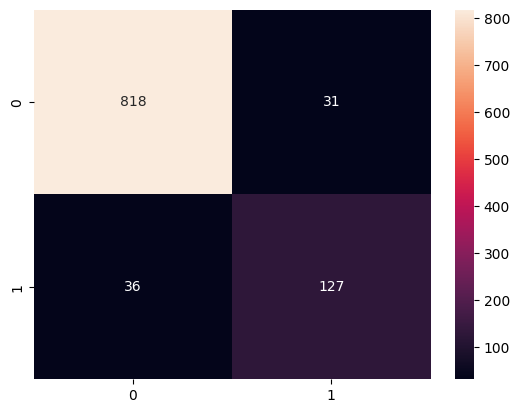

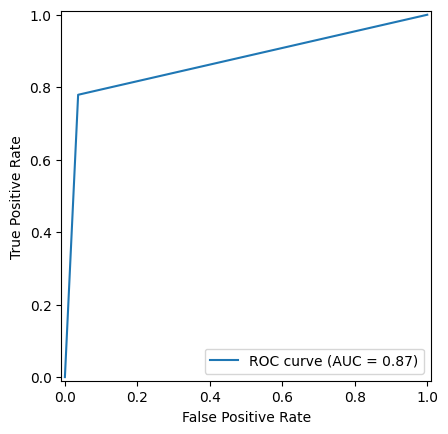

In [43]:
# Model training
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Model evaluation
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       849
           1       0.79      0.77      0.78       163

    accuracy                           0.93      1012
   macro avg       0.87      0.86      0.87      1012
weighted avg       0.93      0.93      0.93      1012

Model accuracy: 0.9288537549407114
F1 score: 0.7763975155279503


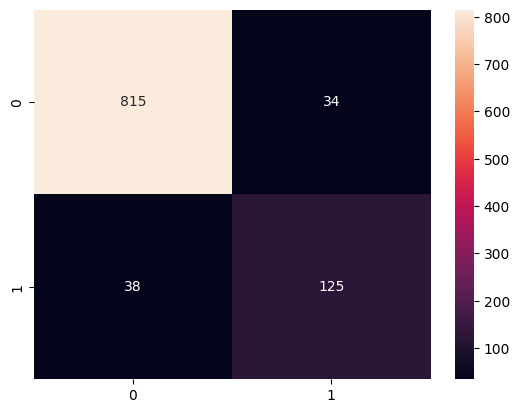

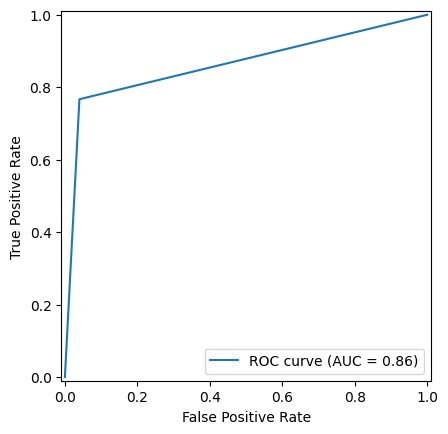

In [44]:
# Model training
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Model evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))
print("F1 score:", f1_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()